In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#import data
data=pd.read_csv('art_science_data-2.csv')

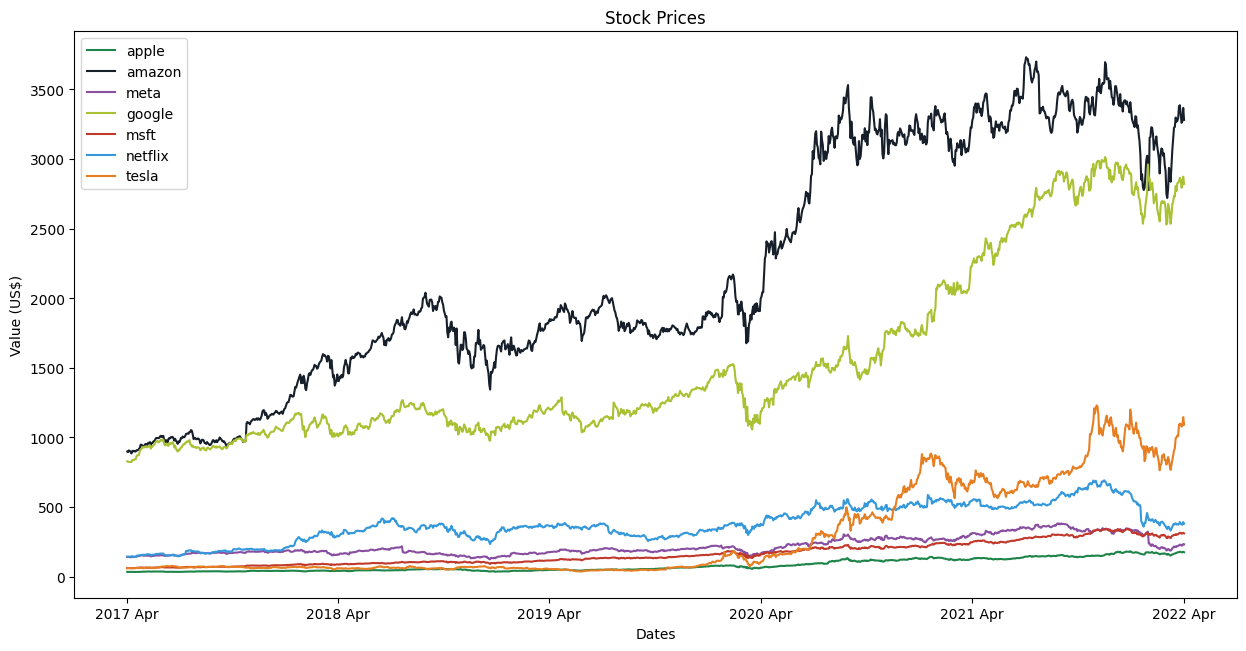

In [3]:
#plot data
mycolors=['#1e8449','#17202a','#884ea0','#a9c132','#c0392b','#3498db','#e67e22']

plt.figure(figsize=(15,7.5), dpi=100)
for i, col in enumerate(data.columns[1:-1]):
    plt.plot(data.Date, data.loc[:,col], color=mycolors[i], label=col)
plt.legend(loc="upper left")
plt.xticks([0,251,502,754,1005,1258], ["2017 Apr", "2018 Apr", "2019 Apr", "2020 Apr", "2021 Apr", "2022 Apr"])
plt.gca().set(title="Stock Prices", xlabel="Dates", ylabel="Value (US$)")
plt.show()

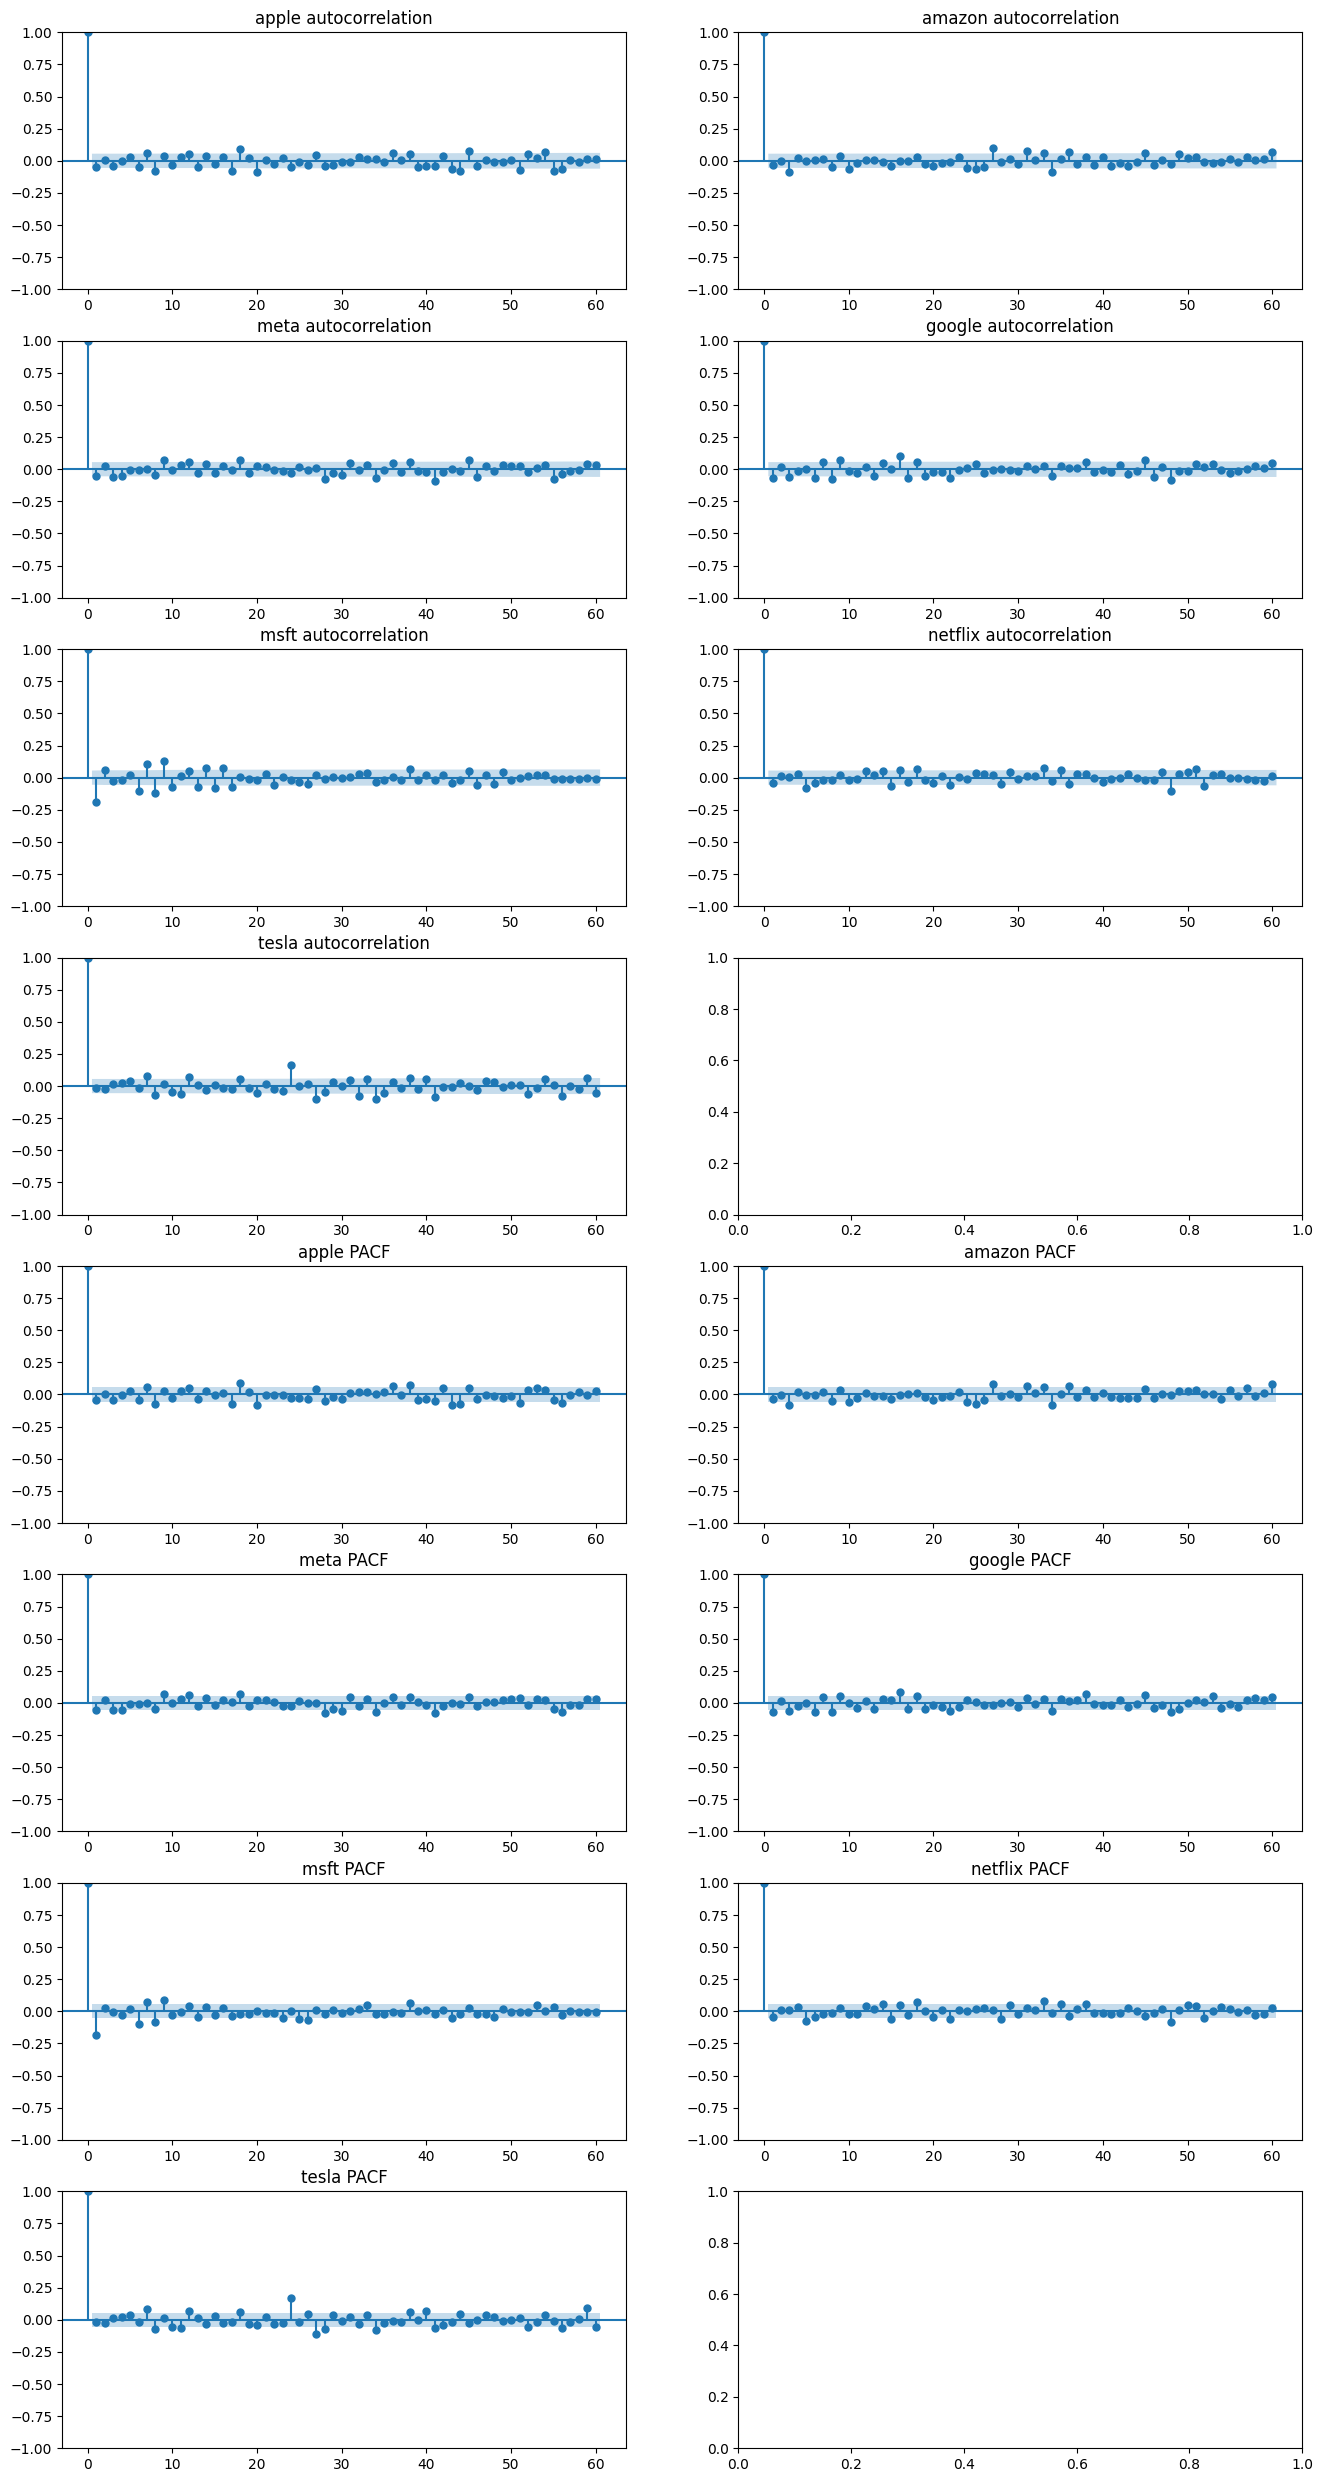

In [4]:
# ACF and PACF of differenced data, 60 lags
fig, axes = plt.subplots(8,2,figsize=(16,32), dpi= 100)
for i,col in enumerate(data.columns[1:-1]):
    plot_acf(data[col].diff().dropna(), lags=60, title=col+' autocorrelation', ax=axes[i//2][i%2])
    plot_pacf(data[col].diff().dropna(), lags=60, title=col+' PACF', method='ywm', ax=axes[i//2+4][i%2])